In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import Ridge
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [5]:
df = pd.read_csv('..\Initial_data\K5P17_1\K5P17_1_cor.csv', sep=";")
df

,K0P125.PV,K5Q2_2.PV,K5FCV4_2I.PV,K5P6.PV,K5PCV6I.PV,K5PCV17_1I.PV,K5P17_1.PV,K5PCV17_2I.PV,K5P17_2.PV,K5F3.PV,...,K5T12.PV,K5P13.PV,K5HCV60I.PV,K5P16_1.PV,K5GKAL.PV,K5HCV61I.PV,K5P16_2.PV,K5FCV4_1I.PV,K5Q2_1.PV,K5P4_1.PV
0,64.11050,320.1875,5.230000,1.098405,97.73969,80.31500,7.741250,99.45000,7.398672,2436.106,...,143.0581,3.989494,97.88750,0.721859,17.52106,97.71094,0.804562,100.0,335.6875,14.37594
1,64.48900,252.9375,5.297500,1.099035,97.75719,80.34594,7.780781,99.44937,7.441875,2443.121,...,143.1656,3.993994,97.93999,0.738281,17.48304,97.75719,0.823555,100.0,332.5313,14.45000
2,64.70700,319.5313,5.372500,1.100649,97.77281,80.41156,7.824687,99.46250,7.490703,2448.294,...,143.2625,3.995606,97.96188,0.709180,17.46435,97.71375,0.813328,100.0,337.7188,14.51437
3,64.84150,323.1875,5.243437,1.100669,97.73875,80.33562,7.850469,99.44531,7.520469,2452.073,...,143.3681,3.995625,98.00031,0.777672,17.48339,97.77937,0.815250,100.0,332.9688,14.57031
4,65.00950,313.2188,5.289063,1.100669,97.76375,80.34469,7.862109,99.45687,7.526640,2454.261,...,143.4394,3.998700,97.98937,0.725008,17.56448,97.85594,0.816633,100.0,335.7813,14.60375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,64.08950,328.8438,5.225313,1.832276,97.93156,80.47813,11.722730,99.55156,11.302730,3034.446,...,165.3031,4.032844,98.07687,1.195562,21.93259,97.62719,1.363461,100.0,691.6563,21.72281
8636,64.45800,385.3125,5.248125,1.829067,97.94125,80.48469,11.795160,99.54843,11.367110,3044.906,...,165.3119,4.027594,98.03094,1.265570,21.93313,97.71375,1.373484,100.0,683.4063,21.83219
8637,64.94750,430.5625,5.161250,1.831213,97.94406,80.52563,11.865000,99.53156,11.437970,3057.319,...,165.3237,4.031438,97.94594,1.173055,21.93608,97.61000,1.366383,100.0,689.4375,21.98938
8638,65.21049,446.8750,5.246875,1.830701,97.92969,80.50468,11.937030,99.52031,11.493670,3064.297,...,165.3181,4.037794,97.98750,1.246375,22.05085,97.59375,1.361766,100.0,692.1875,22.10031


<Axes: >

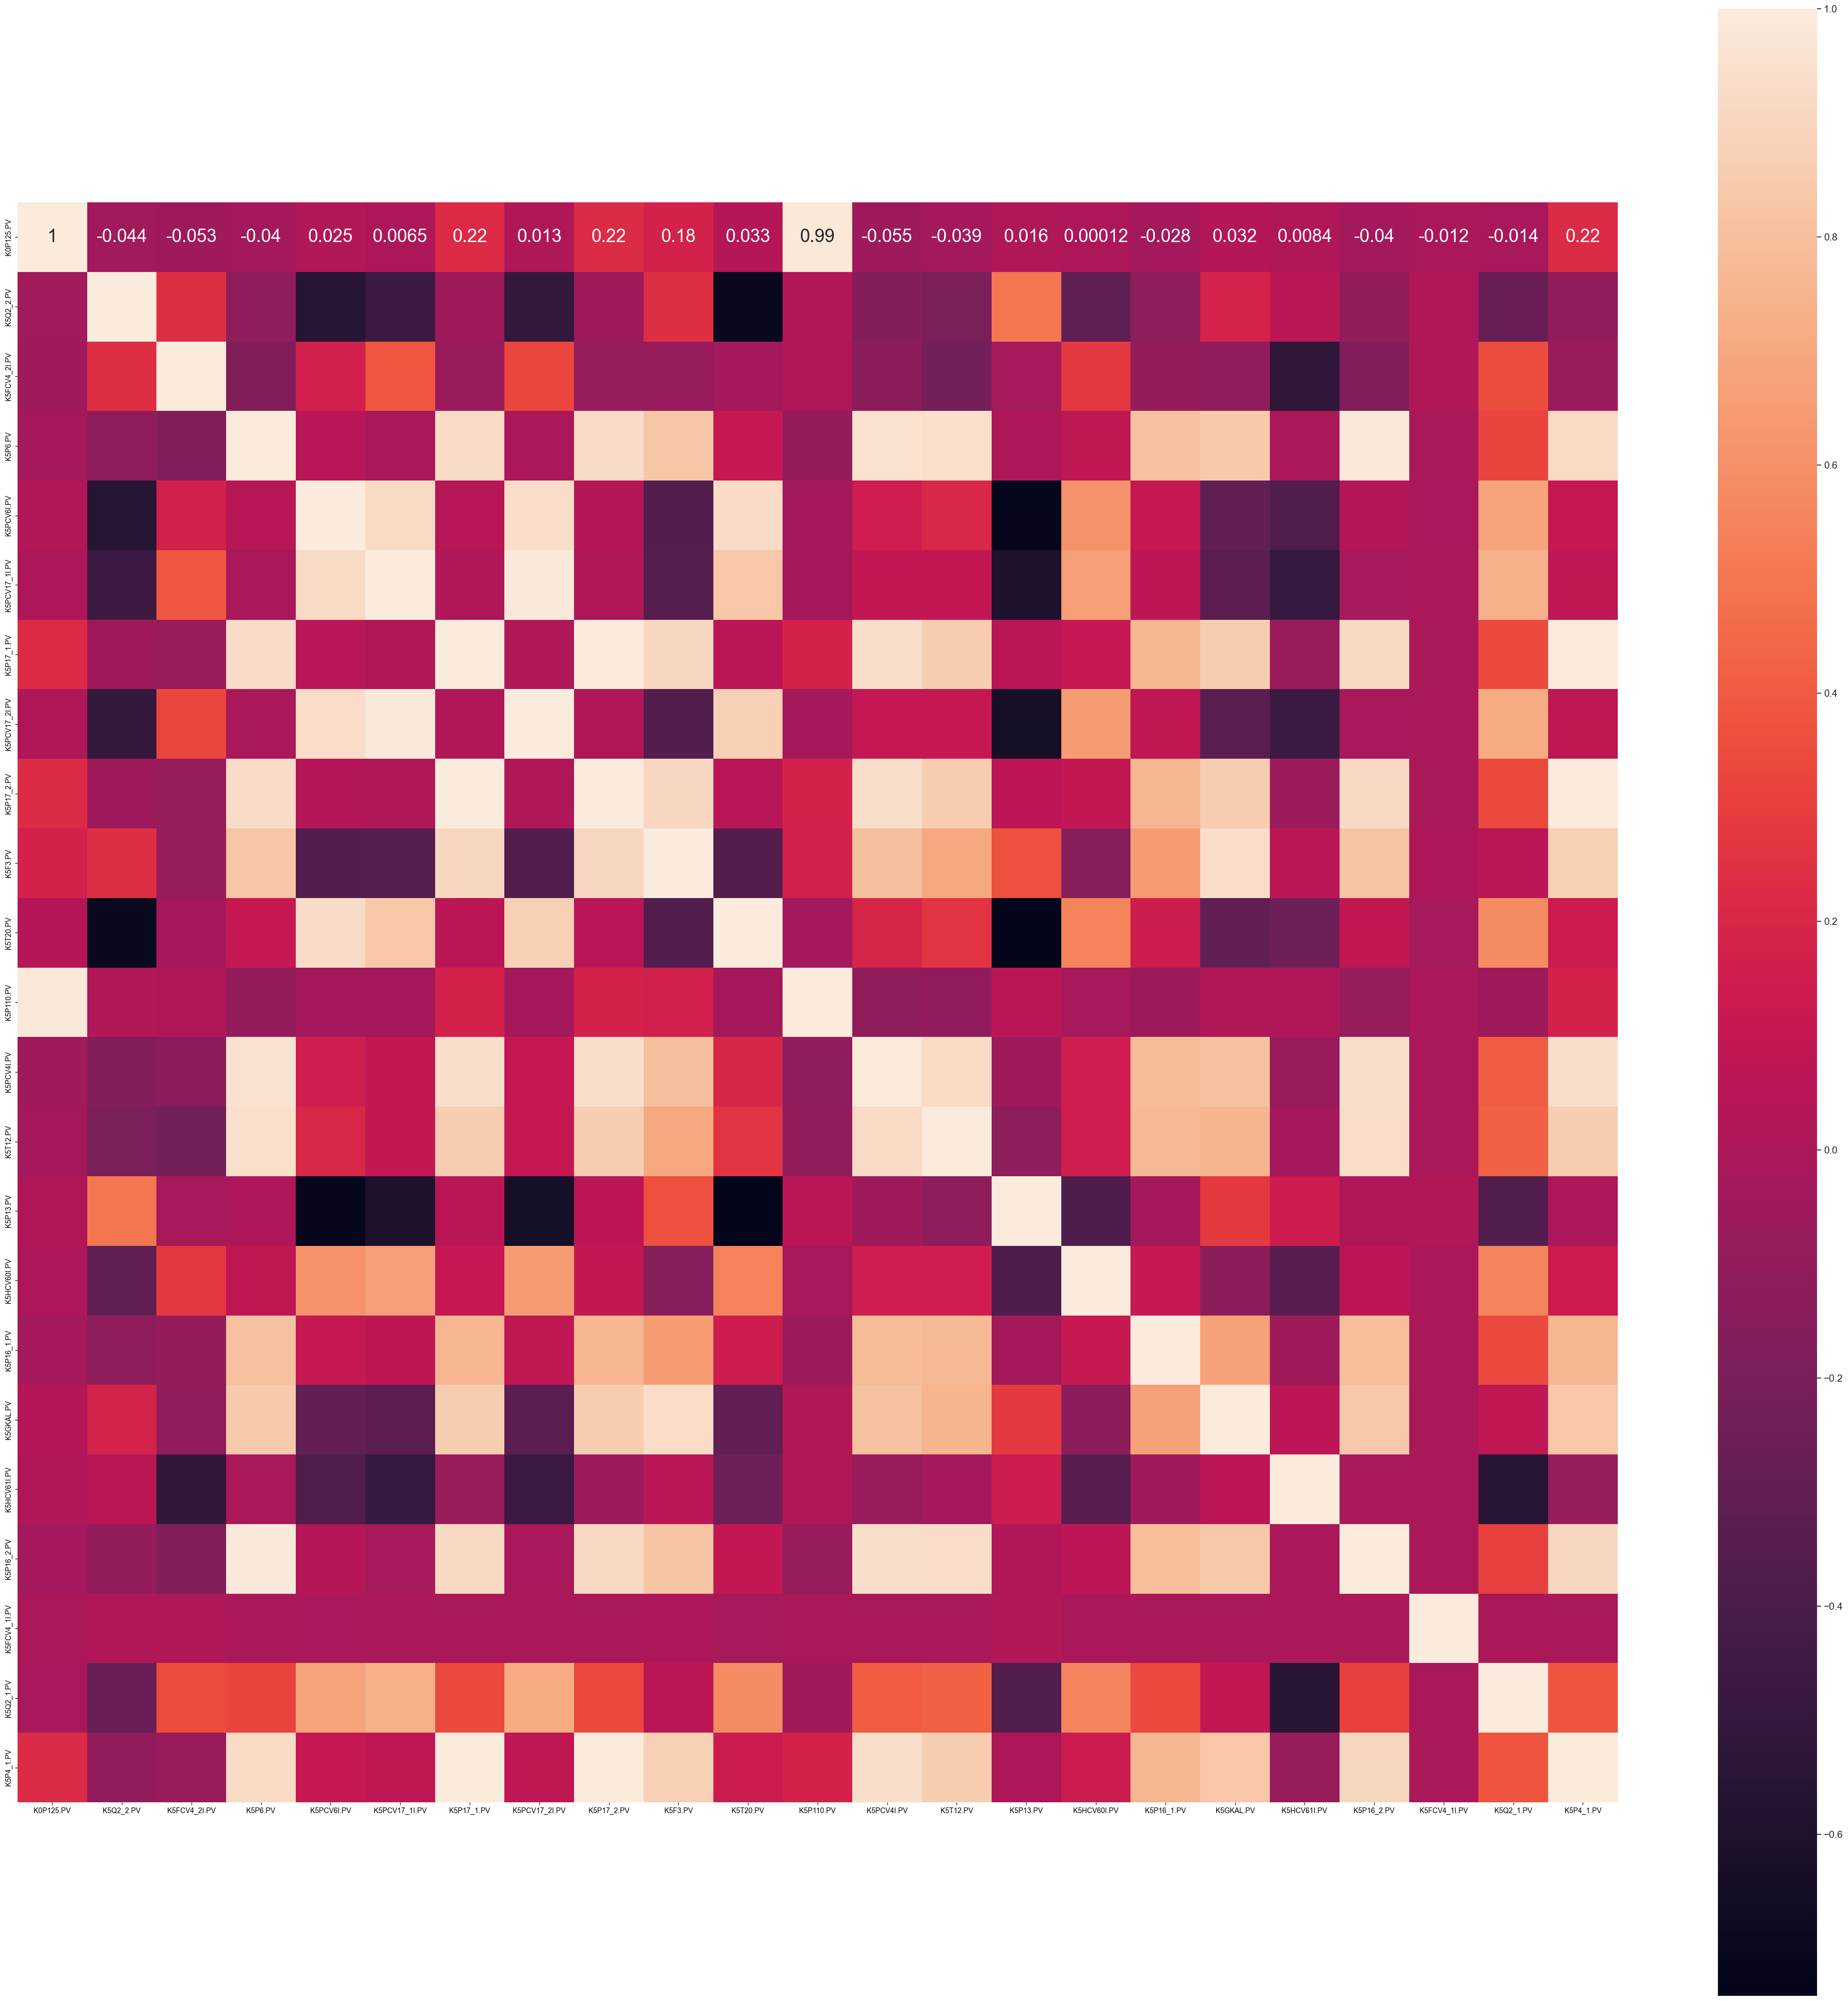

In [6]:
corrmat = df.corr()
fig,ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, annot=True, annot_kws={'size':25}, square=True)

In [9]:
corrmat['K5P17_1.PV']

K0P125.PV        0.216664
K5Q2_2.PV       -0.052174
K5FCV4_2I.PV    -0.071500
K5P6.PV          0.927593
K5PCV6I.PV       0.042117
K5PCV17_1I.PV    0.019057
K5P17_1.PV       1.000000
K5PCV17_2I.PV    0.015864
K5P17_2.PV       0.999603
K5F3.PV          0.906260
K5T20.PV         0.059536
K5P110.PV        0.173769
K5PCV4I.PV       0.940835
K5T12.PV         0.860109
K5P13.PV         0.059921
K5HCV60I.PV      0.098057
K5P16_1.PV       0.757181
K5GKAL.PV        0.861018
K5HCV61I.PV     -0.073088
K5P16_2.PV       0.915968
K5FCV4_1I.PV    -0.004266
K5Q2_1.PV        0.345968
K5P4_1.PV        0.995532
Name: K5P17_1.PV, dtype: float64

In [11]:
df = pd.read_csv('..\Initial_data\K5P17_1\K5P17_1.csv', sep=";")
df

,K5P17_1.PV,K5P4_1.PV
0,9.956797,18.84031
1,9.886484,18.70375
2,9.864297,18.67312
3,9.860000,18.61719
4,9.822422,18.61500
...,...,...
8635,10.162580,19.22500
8636,10.162270,19.18719
8637,10.160780,19.24500
8638,10.106410,19.09844


In [12]:
df=df.dropna()
df=df.round(4)
df=df.drop_duplicates(["K5P17_1.PV"])
df=df.drop_duplicates(["K5P4_1.PV"])
# df=df.drop_duplicates(["K5F3.PV"])
# df=df.drop_duplicates(["K5P5_1.PV"])
df 

,K5P17_1.PV,K5P4_1.PV
0,9.9568,18.8403
1,9.8865,18.7038
2,9.8643,18.6731
3,9.8600,18.6172
4,9.8224,18.6150
...,...,...
8635,10.1626,19.2250
8636,10.1623,19.1872
8637,10.1608,19.2450
8638,10.1064,19.0984


In [13]:
y = df.drop(['K5P4_1.PV'], axis=1)
x = df.drop(['K5P17_1.PV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 25)

In [14]:
lasso = MultiTaskLassoCV(cv=5, random_state=10).fit(x, y)
lasso.score(x, y)
clf = Ridge(alpha=0.5)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9961127313068295

In [15]:
import pickle
filename = '../model/K5P17_1.sav'
pickle.dump(clf, open(filename, 'wb'))

In [16]:
loaded_model = pickle.load(open("../model/K5P17_1.sav", 'rb'))

In [17]:
task2 = {'K5P4_1.PV':[19]}
df2 = pd.DataFrame(data=task2)
df2

,K5P4_1.PV
0,19


In [18]:
loaded_model.predict(df2)

array([[10.188646]])